# What can be learned about the chances of survival from the passenger's age,class,gender and family size?

Formulate hypotheses 1,2,3 and 4

1.The chances of survival is relavent about the pessenger's age and  middle-aged people are easier to survive because children and aged people are disavantaged.

2.The chances of survival is relavent about the pessenger's class and the people who have higher class would survive easier.

3.The chances of survival is relavent about the pessenger's gender and femal are easier to survive because they have better physical quality.

4.The chances of survival is relavent about the pessenger's family size, the people who have lager family zise are easier to survive because they can protect and help each other.

In [119]:
import pandas as pd
import pylab as P
import matplotlib.pyplot as plt

In [120]:
##Input the dateframe which called "A"
##Definit the people who survived named "a"
##Definit the new columes "Gender"and"FamilySize"

A = df = pd.read_csv('train.csv', header=0)
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
a = A[A.Survived == 1]
b = A[A.Survived == 0]
%matplotlib inline

# Overall information about the ratio of survived people

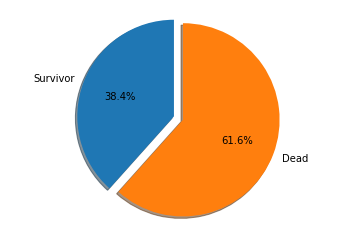

In [121]:
##Sex column have no missing data, so we can count the survived people based on Sex.
Survivor = a.Sex.count()
Dead = b.Sex.count()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')

labels = 'Survivor', 'Dead'
sizes = [Survivor, Dead]
explode = (0.05, 0.05)

plt.show()

# Age

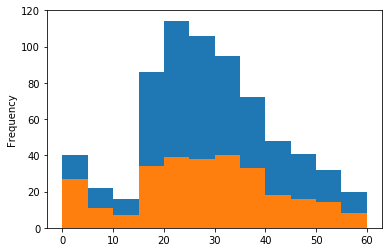

In [122]:
##Use the histdiagram to observe the proportion of survived poeple in different age group.

A['Age'].plot.hist(bins=12,range=(0,60),ylim=(0,120))
a['Age'].plot.hist(bins=12,range=(0,60),ylim=(0,120))

The orange color symbolizes the people who survived, the “ blue color + orange color ” symbolizes the overall number of people.From the histdiagram, we can see roughly that youger people and aged people occupy larger proportion of people who survived in these different aged group.And then I will use the table to get the exact ratio to cheack the information.

In [123]:
##Divide the people in 3 age group.Definit the new columes "Age_G" which is used for sysbolizing the age group.
##"1"means people who=< 15 years old
##"2"means people who < 55 years old and > 15 years years old
##"3"means people who=> 55 years old 

def Ageclassify(x):
    if x['Age'] < 15.01 :
        z = 1
    elif x['Age'] > 54.99:
        z = 3
    else:
        z = 2
    return z

df['Age_G'] = df.apply(Ageclassify,axis=1)
Age_ratio = pd.DataFrame()
Age_ratio['Survived'] = df[['Age_G','Survived']].groupby(['Age_G'])['Survived'].sum()
Age_ratio['PeopleNumber'] = df[['Age_G','Survived']].groupby(['Age_G'])['Survived'].count()
Age_ratio['Ratio'] = Age_ratio.Survived / Age_ratio.PeopleNumber * 100
Age_ratio

,Survived,PeopleNumber,Ratio
Age_G,,,
1,49,83,59.036145
2,280,766,36.553525
3,13,42,30.952381


From the table, we can see the precise survived ratio of 3 different age group. The people who under 15 years old have more chance to survived.Age the middle-aged people have the least chance to survive. This situation is different from my hypothese 1.

# Pclass

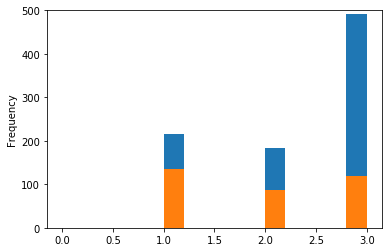

In [124]:
##Use the histdiagram to observe the proportion of survived poeple in different Pclass group.

A['Pclass'].plot.hist(bins=15,range=(0,3),ylim=(0,500))
a['Pclass'].plot.hist(bins=15,range=(0,3),ylim=(0,500))

The orange color symbolizes the people who survived, the “ blue color + orange color ” symbolizes the overall number of people.From the histdiagram, we can see roughly that people in 3 Pclass occupies the biggest proportion of people who survived in these 3 Pclass group.And then I will use the table to get the exact ratio to cheack the information.

In [125]:
##Get the precise ratio of survived people in different Pclass
Pclass_ratio = pd.DataFrame()
Pclass_ratio['Survived'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()
Pclass_ratio['PeopleNumber'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
Pclass_ratio['Ratio'] = Pclass_ratio.Survived / Pclass_ratio.PeopleNumber * 100
Pclass_ratio

,Survived,PeopleNumber,Ratio
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


From the table, we can see the precise survived ratio in 3 different Pclass group. The people who are in higher Pclass have more chance to survived. The people in Pclass 1 are easist to dead. And this situation is correspond with my hypotheses 2.

# Gender

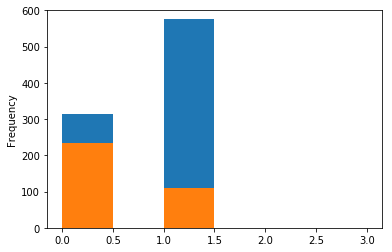

In [126]:
##Use the histdiagram to observe the proportion of survived poeple in different Gender.
A['Gender'].plot.hist(bins=6,range=(0,3),ylim=(0,600))
a['Gender'].plot.hist(bins=6,range=(0,3),ylim=(0,600))

The orange color symbolizes the people who survived, the “ blue color + orange color ” symbolizes the overall number of people.From the histdiagram, we can see roughly that female occupies larger proportion of people who survived in different gender.And then I will use the table to get the exact ratio to cheack the information.

In [127]:
##Get the precise ratio of survived people in different Pclass
Gender_ratio = pd.DataFrame()
Gender_ratio['Survived'] = df[['Gender','Survived']].groupby(['Gender'])['Survived'].sum()
Gender_ratio['PeopleNumber'] = df[['Gender','Survived']].groupby(['Gender'])['Survived'].count()
Gender_ratio['SurvivedRatio'] = Gender_ratio.Survived / Gender_ratio.PeopleNumber * 100
Gender_ratio

,Survived,PeopleNumber,SurvivedRatio
Gender,,,
0,233,314,74.203822
1,109,577,18.890815


From the table, we can see the precise survived ratio in different gender. The female have much larger change to survive. This situation is different from my hypotheses . Maybe it is because that male are more likely to protect female so they got more risk and dangerous

# FamilySize

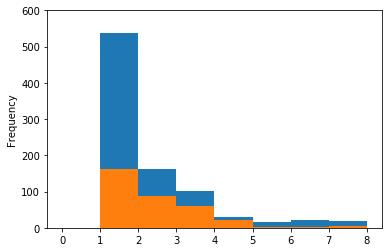

In [128]:
##Use the histdiagram to observe the proportion of survived poeple in different Familysize group.
A['FamilySize'].plot.hist(bins=8,range=(0,8),ylim=(0,600))
a['FamilySize'].plot.hist(bins=8,range=(0,8),ylim=(0,600))


The orange color symbolizes the people who survived, the “ blue color + orange color ” symbolizes the overall number of people.From the histdiagram, we can see roughly that most of the people are in small size family or single. And it is not easy to judge which kind of familysize have larger chance to survive.And then I will use the table to get the exact ratio to cheack the information.

In [129]:
##Get the precise ratio of survived people in different Familysize
Familysize_ratio = pd.DataFrame()
Familysize_ratio['Survived'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].sum()
Familysize_ratio['PeopleNumber'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].count()
Familysize_ratio['SurvivedRatio'] = Familysize_ratio.Survived / Familysize_ratio.PeopleNumber * 100
Familysize_ratio

,Survived,PeopleNumber,SurvivedRatio
FamilySize,,,
1,163,537,30.353818
2,89,161,55.279503
3,59,102,57.843137
4,21,29,72.413793
5,3,15,20.000000
6,3,22,13.636364
7,4,12,33.333333
8,0,6,0.000000
11,0,7,0.000000


From the table, we can see the precise survived ratio in different Familysize group. The people who are in big familysize have less change to survive.And the people who are in 4 people's size family have the largest chance to survive. This situation is different from my hypotheses 4.

# Campare 2 different kinds of figures at the same time.

# Age and Fare

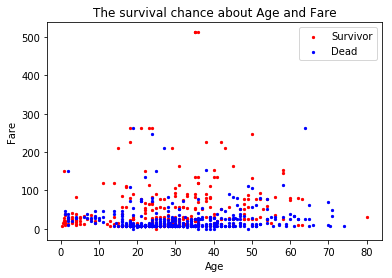

In [130]:
fig, ax = plt.subplots()

xSurvivor = df.Age[df.Survived==1]   ##survivor
xDead = df.Age[df.Survived==0]       ##dead
ySurvivor = df.Fare[df.Survived==1]  ##survivor
yDead = df.Fare[df.Survived==0]      ##dead

ax.set_xlabel('Age')
ax.set_ylabel('Fare')

m = ax.scatter(xSurvivor, ySurvivor, 5, 'red')
n = ax.scatter(xDead, yDead,5, 'blue')

ax.legend([m,n],['Survivor','Dead'])
plt.title('The survival chance about Age and Fare') 

plt.show()

From the diagram ,we can see that children and people who paid higher price of tickets have more chance to survive.

# Familysize and Pclass

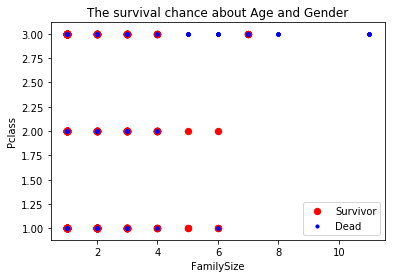

In [131]:
fig, ax = plt.subplots()

xSurvivor = df.FamilySize[df.Survived==1]     ##survivor
xDead = df.FamilySize[df.Survived==0]         ##dead
ySurvivor = df.Pclass[df.Survived==1]         ##survivor
yDead = df.Pclass[df.Survived==0]             ##dead

ax.set_xlabel('FamilySize')
ax.set_ylabel('Pclass')

m = ax.scatter(xSurvivor, ySurvivor, 40, 'red')
n = ax.scatter(xDead, yDead,10, 'blue')

ax.legend([m,n],['Survivor','Dead'])
plt.title('The survival chance about Age and Gender') 

plt.show()

From the diagram ,we can see that people who have smaller size of family and higer Pclass have more chance to survive.

# Gender and Age

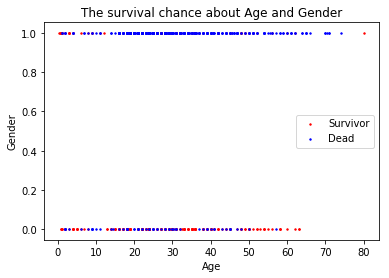

In [132]:
fig, ax = plt.subplots()

xSurvivor = df.Age[df.Survived==1]     ##survivor
xDead = df.Age[df.Survived==0]         ##dead
ySurvivor = df.Gender[df.Survived==1]  ##survivor
yDead = df.Gender[df.Survived==0]      ##dead

ax.set_xlabel('Age')
ax.set_ylabel('Gender')

m = ax.scatter(xSurvivor, ySurvivor, 2, 'red')
n = ax.scatter(xDead, yDead,2, 'blue')

ax.legend([m,n],['Survivor','Dead'])
plt.title('The survival chance about Age and Gender') 

plt.show()

From the diagram ,we can see that female and children have more chance to survive.

# Conclusion

People who are children,female ,who have smaller familysize ,higher fare and in higher class have more chance to survive

And my hypothese 1 is wrong,hypothese 2 is right, hypothese 3 is wrong and hypothese 4 is wrong.